In [105]:
#import statements

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
import pprint



# load and prepare data

In [41]:
df = pd.read_csv("iris.csv")

df=df.rename(columns={"species":"label"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
label           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Train_TEST_SPLIT



In [43]:
def train_test_split(df,test_size):
    
    if isinstance(test_size,float):
        test_size=round(test_size*len(df))
        
    indices=df.index.tolist()
    test_indices=random.sample(population=indices,k=test_size)
    test_df=df.loc[test_indices]
    train_df=df.drop(test_indices)
    
    return train_df,test_df


In [44]:
random.seed(0)
train_df,test_df= train_test_split(df,test_size=20) 

In [45]:
test_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,label
98,5.1,2.5,3.0,1.1,versicolor
107,7.3,2.9,6.3,1.8,virginica
10,5.4,3.7,1.5,0.2,setosa
66,5.6,3.0,4.5,1.5,versicolor
130,7.4,2.8,6.1,1.9,virginica


# Helper function


In [46]:
data= train_df.values #pandas data lie numpy array maa change gareko inorder to makefast
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa']], dtype=object)

## data puring


In [47]:
def check_purity(data):
    label_column =data[:,-1]
    unique_labelnames=np.unique(label_column)
    
    if len(unique_labelnames) ==1:
     return True
    else:
     return False

### classify (if true ko case maa)


In [48]:
def classify_data(data):
    label_column=data[:,-1]
    unique_classes,counts_unique_classes=np.unique(label_column,return_counts=True) #returns labelname and counts jun cahi kati choti aako xa

    index=counts_unique_classes.argmax() #largly apper vako label kun ho tyo chai 0 ko rup maa auxa
    classification=unique_classes[index] # kun mma zero aako xa tesko name dinxa for example arr[0]maa k xa name aakko jesto 
   
    return classification

### potential splits

In [49]:
train_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
def get_potential_splits(data):
    
    potential_splits={}
    _,n_columns=data.shape
    for column_index in range(n_columns-1):
         potential_splits[column_index]=[]
         values=data[:,column_index]
         unique_values=np.unique(values)
        
         for index in range(len(unique_values)):
             if index!=0:
                current_value=unique_values[index]
                previous_value=unique_values[index-1]
                potential_split=(current_value+previous_value)/2
            
                potential_splits[column_index].append(potential_split)
            
    return potential_splits

In [51]:
potential_splits=get_potential_splits(train_df.values)

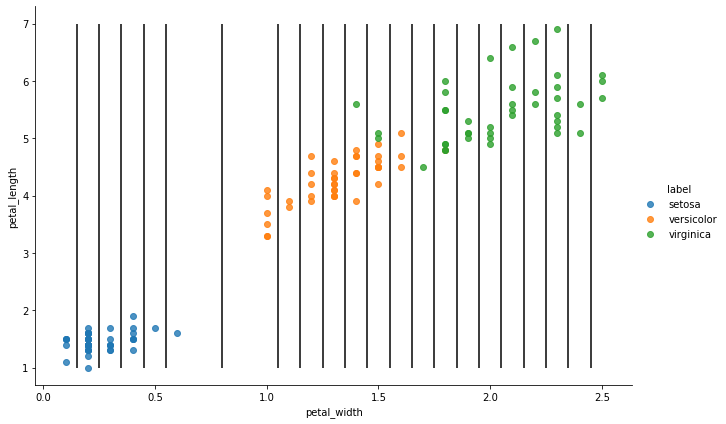

In [52]:
sns.lmplot(data=train_df,x='petal_width',y='petal_length',hue='label',fit_reg=False,size=6,aspect=1.5)

plt.vlines(x=potential_splits[3],ymin=1,ymax=7)
#plt.hlines(y=potential_splits[2],xmin=0.2,xmax=2.5)

# split data

In [53]:
 def split_data(data,split_column,split_value):
        split_column_values=data[:,split_column]
        
        data_below=data[split_column_values<=split_value]
        data_above=data[split_column_values>=split_value]
        return data_below,data_above

In [54]:
split_column=3
split_value=0.8

In [55]:
split_data(data,split_column,split_value)

(array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
        [4.9, 3.0, 1.4, 0.2, 'setosa'],
        [4.7, 3.2, 1.3, 0.2, 'setosa'],
        [4.6, 3.1, 1.5, 0.2, 'setosa'],
        [5.0, 3.6, 1.4, 0.2, 'setosa'],
        [5.4, 3.9, 1.7, 0.4, 'setosa'],
        [4.6, 3.4, 1.4, 0.3, 'setosa'],
        [5.0, 3.4, 1.5, 0.2, 'setosa'],
        [4.4, 2.9, 1.4, 0.2, 'setosa'],
        [4.9, 3.1, 1.5, 0.1, 'setosa'],
        [4.8, 3.4, 1.6, 0.2, 'setosa'],
        [4.8, 3.0, 1.4, 0.1, 'setosa'],
        [4.3, 3.0, 1.1, 0.1, 'setosa'],
        [5.8, 4.0, 1.2, 0.2, 'setosa'],
        [5.7, 4.4, 1.5, 0.4, 'setosa'],
        [5.4, 3.9, 1.3, 0.4, 'setosa'],
        [5.1, 3.5, 1.4, 0.3, 'setosa'],
        [5.7, 3.8, 1.7, 0.3, 'setosa'],
        [5.1, 3.8, 1.5, 0.3, 'setosa'],
        [5.4, 3.4, 1.7, 0.2, 'setosa'],
        [5.1, 3.7, 1.5, 0.4, 'setosa'],
        [4.6, 3.6, 1.0, 0.2, 'setosa'],
        [5.1, 3.3, 1.7, 0.5, 'setosa'],
        [5.0, 3.0, 1.6, 0.2, 'setosa'],
        [5.0, 3.4, 1.6, 0.4, 'setosa'],


In [56]:
data_below,data_above=split_data(data,split_column,split_value)

(0, 2.6)

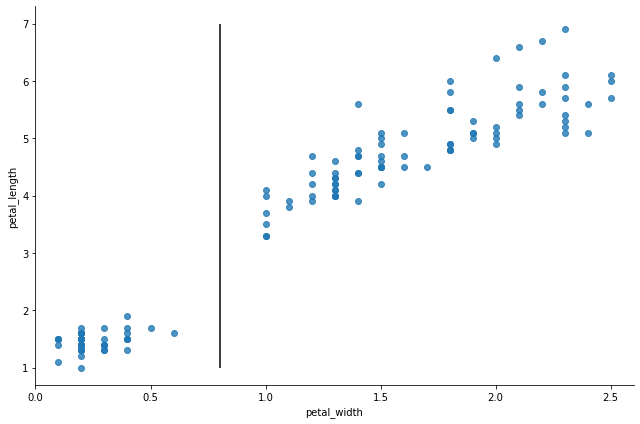

In [57]:
plotting_df=pd.DataFrame(data,columns=df.columns)
sns.lmplot(data=plotting_df,x='petal_width',y='petal_length',fit_reg=False,size=6,aspect=1.5)
plt.vlines(x=split_value,ymin=1,ymax=7)
plt.xlim(0,2.6)

# lowest overall entropy

In [58]:
def calculate_entropy(data):
    
    label_column= data[:,-1]
    _,counts=np.unique(label_column,return_counts=True)
    
    probabilties=counts / counts.sum()
    entropy=sum(probabilties *-np.log2(probabilties))
    
    return entropy

In [59]:
def calculate_overall_entropy(data_below,data_above):
    
    n_data_points=len(data_below) +len(data_above)
    
    p_data_below=len(data_below)/n_data_points
    p_data_above=len(data_above)/n_data_points
    
    overall_entropy=(p_data_below * calculate_entropy(data_below)
                     +p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [60]:
calculate_overall_entropy(data_below,data_above)

0.6461538461538462

# now detemining best spliit

In [61]:
def determining_best_split(data,potential_splits):
    
    overall_entropy=999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below,data_above=split_data(data,split_column=column_index,split_value=value)
            current_overall_entropy=calculate_overall_entropy(data_below,data_above)
            
            if current_overall_entropy<= overall_entropy:
                overall_entropy=current_overall_entropy
                best_split_column=column_index
                best_split_value=value
            
    
    return best_split_column,best_split_value

In [62]:
potential_splits=get_potential_splits(data)

In [63]:
determining_best_split(data,potential_splits)

(3, 0.8)

# Decision Tree Algorithm

In [64]:
#sub_tree={question:[yes_answer,no_answer]} #model

# Algorithm

In [115]:
def decision_tree_algorithm(df,counter=0,min_samples=2,max_depth=5):
    #data prepatations
    if counter==0:
        global COLUMN_HEADERS
        COLUMN_HEADERS=df.columns
        data=df.values
    else:
        data=df
    #base case
    if (check_purity(data)) or (len(data) < min_samples) or (counter==max_depth):
        classification=classify_data(data)
        return classification
    #recursive part
    else:
        counter+=1
        
        #helperfunction
        potential_splits=get_potential_splits(data)
        split_column,split_value=determining_best_split(data,potential_splits)
        data_below,data_above=split_data(data,split_column,split_value)
       
       #instantiate sub-tree
        feature_name=COLUMN_HEADERS[split_column]
        question="{} <- {}".format(feature_name,split_value)
        sub_tree={question:[]}
        
        #find answer(recursion)
        yes_answer=decision_tree_algorithm(data_below,counter,min_samples,max_depth)  
        no_answer=decision_tree_algorithm(data_above,counter,min_samples,max_depth)
        
        if yes_answer==no_answer:
           sub_tree=yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree
            

In [116]:
tree=decision_tree_algorithm(train_df,max_depth=3)
tree

{'petal_width <- 0.8': ['setosa', {'petal_width <- 1.55': [{'petal_length <- 4.95': ['versicolor', 'virginica']}, 'virginica']}]}

# Classification

In [117]:
#sub_tree={question:[yes_answer,no_answer]}

In [118]:
example=test_df.iloc[1]
example

sepal_length          6.3
sepal_width           2.8
petal_length          5.1
petal_width           1.5
label           virginica
Name: 133, dtype: object

In [119]:
def classify_example(example,tree):
    question=list(tree.keys())[0]
    feature_name,comparision_operator,value=question.split()
    
    #askquestion
    if example[feature_name]<=float(value):
        answer=tree[question][0]
    else:
        answer=tree[question][1]
        
     #basecase
    if not isinstance(answer,dict):
        return answer
    #recursivepart
    else:
        residual_tree=answer
        return classify_example(example,residual_tree)
    


In [120]:
classify_example(example,tree)

'virginica'

# accuray

In [121]:
def calculate_accuracy(df,tree):
    #new 2 columns
    df["classification"]=df.apply(classify_example,axis=1,args=(tree,))
    df["classification_correct"]=df.classification==df.label
    
    accuracy=df.classification_correct.mean()
    
    
    return accuracy

In [122]:
calculate_accuracy(test_df,tree)

0.8

In [123]:
print(tree)

{'petal_width <- 0.8': ['setosa', {'petal_width <- 1.55': [{'petal_length <- 4.95': ['versicolor', 'virginica']}, 'virginica']}]}


In [127]:
test_df

,sepal_length,sepal_width,petal_length,petal_width,label,classification,classification_correct
119,6.0,2.2,5.0,1.5,virginica,versicolor,False
10,5.4,3.7,1.5,0.2,setosa,setosa,True
25,5.0,3.0,1.6,0.2,setosa,setosa,True
100,6.3,3.3,6.0,2.5,virginica,virginica,True
51,6.4,3.2,4.5,1.5,versicolor,versicolor,True
66,5.6,3.0,4.5,1.5,versicolor,versicolor,True
91,6.1,3.0,4.6,1.4,versicolor,versicolor,True
120,6.9,3.2,5.7,2.3,virginica,virginica,True
145,6.7,3.0,5.2,2.3,virginica,virginica,True
43,5.0,3.5,1.6,0.6,setosa,setosa,True


In [126]:
train_df,test_df= train_test_split(df,test_size=20) 
tree=decision_tree_algorithm(train_df,max_depth=3)
accuracy=calculate_accuracy(test_df,tree)
print(tree)
print(accuracy)


{'petal_width <- 0.75': ['setosa', {'petal_width <- 1.75': [{'petal_length <- 5.05': ['versicolor', 'virginica']}, 'virginica']}]}
0.95


In [128]:
test_df

,sepal_length,sepal_width,petal_length,petal_width,label,classification,classification_correct
119,6.0,2.2,5.0,1.5,virginica,versicolor,False
10,5.4,3.7,1.5,0.2,setosa,setosa,True
25,5.0,3.0,1.6,0.2,setosa,setosa,True
100,6.3,3.3,6.0,2.5,virginica,virginica,True
51,6.4,3.2,4.5,1.5,versicolor,versicolor,True
66,5.6,3.0,4.5,1.5,versicolor,versicolor,True
91,6.1,3.0,4.6,1.4,versicolor,versicolor,True
120,6.9,3.2,5.7,2.3,virginica,virginica,True
145,6.7,3.0,5.2,2.3,virginica,virginica,True
43,5.0,3.5,1.6,0.6,setosa,setosa,True


In [129]:
test_df.loc[119]

sepal_length                       6
sepal_width                      2.2
petal_length                       5
petal_width                      1.5
label                      virginica
classification            versicolor
classification_correct         False
Name: 119, dtype: object

In [135]:
print(tree)

{'petal_width <- 0.75': ['setosa', {'petal_width <- 1.75': [{'petal_length <- 5.05': ['versicolor', 'virginica']}, 'virginica']}]}


In [136]:
##finish for continuous data ko lagi matra